# Truncating a Gaussian simulation


This notebook illustates the principles of truncation of a Gaussian field. The Truncated Gaussian Simulation (TGS) method and the Pluri-Gaussian Simulation (PGS) methods are based on this principle.

A big chunk of this notebook is based on the Sequential Gaussian Simulation method. Therefore, we omit some of the details that were already explained in the corresponding notebook.

First of all, import the required modules.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import time
import copy

# import package 'geone'
import geone as gn

Define and plot a variogram model.

Text(0.5, 0.98, '')

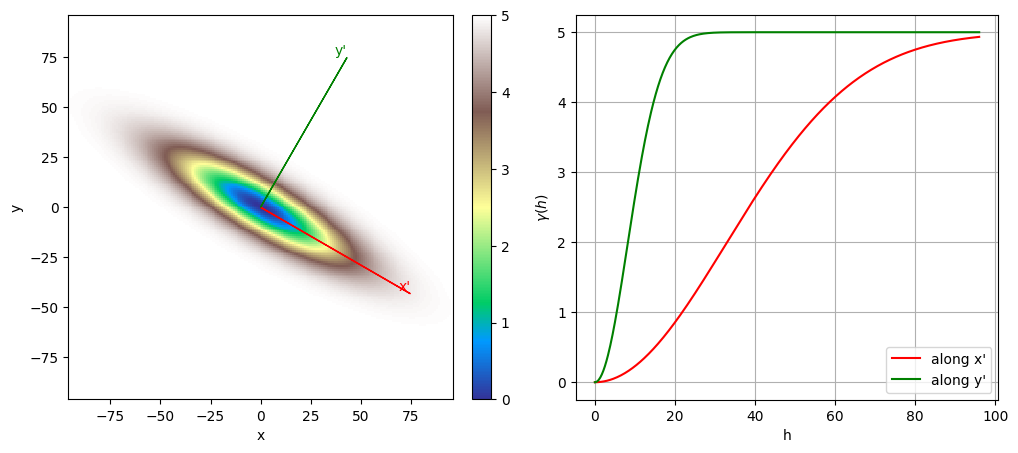

In [2]:
cov_model = gn.covModel.CovModel2D(elem=[
    ('gaussian', {'w':5., 'r':[80,20]}), # elementary contribution
    ('nugget', {'w':0.0})                # elementary contribution
    ], alpha=30, name='model-2D')

# Plot
cov_model.plot_model(vario=True, figsize=((12,5)))
pl.suptitle("")

Define the simulation grid.

In [3]:
nx, ny = 220, 230  # number of cells
dx, dy = 1.0, 1.0  # cell unit
ox, oy = 0.0, 0.0  # origin

dimension = (nx, ny)
spacing = (dx, dy)
origin = (ox, oy)


Perform sequential Gaussian simulation.

In [4]:
nreal = 3
np.random.seed(321)
geosclassic_output = gn.geosclassicinterface.simulate2D(cov_model, dimension, spacing, origin, 
                                                        method='ordinary_kriging', 
                                                        searchRadiusRelative=3.0, nneighborMax=12,
                                                        nreal=nreal, nthreads=1)

Geos-Classic running... [VERSION 2.0 / BUILD NUMBER 20230914 / OpenMP 1 thread(s)]
Geos-Classic run complete


Retrieve the results of the simulation from the return value provided by `simulate2D`.

In [5]:
# Retrieve the realizations
simul = geosclassic_output['image']

## Plotting the results
To plot one of of the realizations, you can use the following line (where `iv=2` means the 3rd realization)

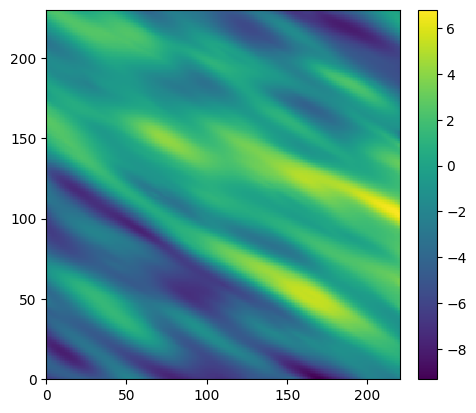

In [6]:
gn.imgplot.drawImage2D(simul, iv=2)
pl.show()

The histogram on all the realizations is the following

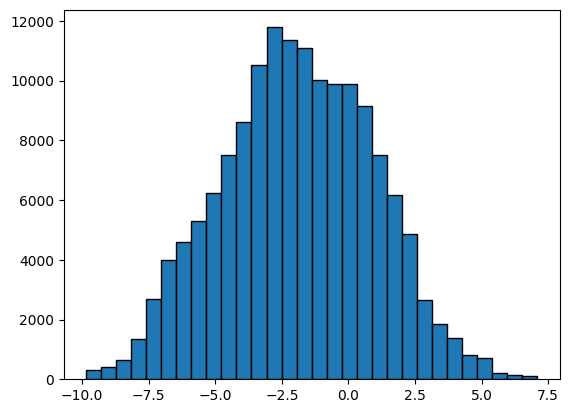

In [7]:
pl.hist(simul.val.ravel(), bins=30, edgecolor="black")
pl.show()

This visualization is useful to define some threshold values. For example, we could choose the values -5.0 and 2.

## Truncate

>**Note** We need to do a `deepcopy` of the *Image* object, otherwise the risk is to edit the values of `trunk` and `simul` at the same time!

Create a copy of the simulation *Image* object to store the result of the truncation procedure.

In [8]:
trunc = copy.deepcopy(simul)
trunc.val[:,:,:,:] = 1 # Code for values below -5, for the moment everywhere in the grid
trunc.val[simul.val>-5] = 2 # Code for values between -5 and 2
trunc.val[simul.val>2] = 3 # Code for values above 2

Visualize one selected realization.

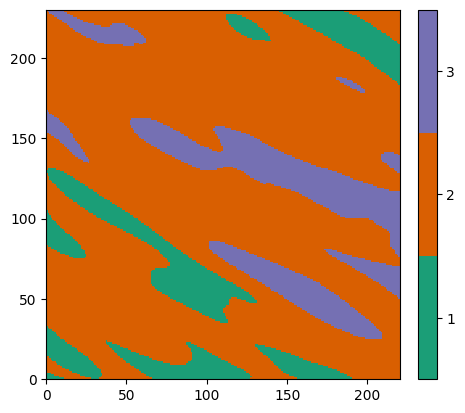

In [11]:
categCol = ['#1b9e77', '#d95f02', '#7570b3']

gn.imgplot.drawImage2D(trunc, iv=2, categ=True, categCol=categCol)
pl.show()

## Truncated histogram

We can also plot the histogram of the truncated values.

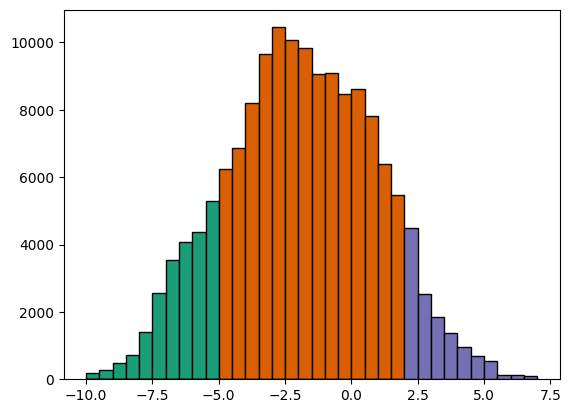

In [10]:
bins = np.arange(-10,7.5,0.5)
pl.hist(simul.val[trunc.val==1].ravel(), bins, color=categCol[0], edgecolor="black")
pl.hist(simul.val[trunc.val==2].ravel(), bins, color=categCol[1],edgecolor="black")
pl.hist(simul.val[trunc.val==3].ravel(), bins, color=categCol[2],edgecolor="black")
pl.show()